You must run the first four code blocks in order to set everything up properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from M_process_solver import MProcessSolver
%matplotlib inline

The following recursive function gives the particle size distribution at a given time step.

In [2]:
def v(t, M, S):
    if t == 0:
        return S[:,[0]]
    else:
        return S[:,[t]] + np.dot(M, v(t-1, M, S))

The following function gives back an M-matrix given the diagonals.

In [3]:
def getLMatrix(a):
    L = len(a)
    M = np.zeros((L, L))
    for i in range(L):
        M[i, i] = a[i]
        if i<L-1:
            M[i+1,i] = 1 - a[i]
    return M

The following function returns the RMSE for a solved matrix when compared to the original matrix.

In [4]:
def RMSE(M, M_solved):
    sum = 0
    for i in range(M.shape[0]):
        sum += (M[i,i]-M_solved[i,i])**2
    sum /= M.shape[0]
    return np.sqrt(sum)

Now let's generate a random probability transition matrix for two size classes, along with some semi-random sourcing data for 20 time steps.

In [5]:
N = 20

a = np.random.rand()
M = np.array([[a, 0], [1-a, 1]])
print 'M = \n', M

S = 100*np.random.rand(2, N)
print 'S = \n', S

M = 
[[ 0.64764629  0.        ]
 [ 0.35235371  1.        ]]
S = 
[[ 14.39370486  19.24672483  63.3661982   18.92875142  45.18882839
    8.7235628   41.51336002  50.92636859  37.30073159  97.25202626
   62.66467306  90.38530029  48.46570148  96.65639769  10.0350329
   75.46125705  80.4493572   25.54148193   2.55678023  82.97891452]
 [ 11.55621881   8.02620428  28.16153407  84.66564406  34.19315483
   97.50191644  46.749267    88.68154201  86.48392277  30.40278098
   44.01622035  34.31688088   4.88240304  56.1984034   34.33661763
   87.22784452  88.38914564  81.93502244   6.06080586  87.71143821]]


And now iterate forward to find the final distribution.

In [6]:
v_f = v(N-1, M, S)
print 'v_f = \n', v_f

v_f = 
[[  147.28075113]
 [ 1866.25136939]]


Now let's create an MProcessSolver object and use it along with S and v_f to solve for the original M.

In [7]:
solver = MProcessSolver(S, v_f)
M_solved = getLMatrix(solver.getGenSol())
print 'M_solved = \n', M_solved

print '\nerror =', RMSE(M, M_solved)

M_solved = 
[[ 0.64764629  0.        ]
 [ 0.35235371  1.        ]]

error = 7.85046229342e-17


As you can see, the accuracy is quite high!

Now let us use 5 size classes instead of 2 and test the reduction method for solving this more complex problem.

In [8]:
N = 20
L = 5

a = np.random.rand(L)
a[-1] = 1
M = getLMatrix(a)
print 'M = \n', M

S = 100*np.random.rand(L, N)
print 'S = \n', S

M = 
[[ 0.43316026  0.          0.          0.          0.        ]
 [ 0.56683974  0.18697129  0.          0.          0.        ]
 [ 0.          0.81302871  0.52519385  0.          0.        ]
 [ 0.          0.          0.47480615  0.21878217  0.        ]
 [ 0.          0.          0.          0.78121783  1.        ]]
S = 
[[ 19.34925611  61.0632341   38.0734152   25.86436958  34.25772133
    5.04375972  46.13302112  28.7641111   57.9495371   30.77443701
    7.43343109  58.88532744  77.88571839  57.94720354  87.05182129
   47.41250327  68.4471127   91.12134001  27.95463471  90.00746352]
 [ 77.89934632   0.22318922  86.29343411  64.12070333  69.34511642
    1.53727882  41.73211234  42.03477695  12.76789823  82.9122634
   35.14457784  96.63725463   4.09900723  16.0017081   50.05006274
   31.62634228  72.51078157  96.03111486  63.69542064  67.94245236]
 [ 87.41546253  76.17856034  38.77011825  14.77212092  88.28695948
   55.27856591  43.16616345  22.49233509  11.36231486  91.18235349
   

In [9]:
v_f = v(N-1, M, S)
print 'v_f = \n', v_f

v_f = 
[[  128.47060934]
 [  151.70815346]
 [  425.62463448]
 [  304.44539061]
 [ 3671.23638805]]


In [10]:
solver = MProcessSolver(S, v_f)
M_solved = getLMatrix(solver.getGenSol())
print 'M_solved = \n', M_solved

print '\nerror =', RMSE(M, M_solved)

M_solved = 
[[ 0.43316026  0.          0.          0.          0.        ]
 [ 0.56683974  0.18697129  0.          0.          0.        ]
 [ 0.          0.81302871  0.52519385  0.          0.        ]
 [ 0.          0.          0.47480615  0.21878217  0.        ]
 [ 0.          0.          0.          0.78121783  1.        ]]

error = 3.00222453187e-16


To investigate the strength of our method on ideal data, let us run some simpe diagnostics. Below is the average error plotted as a function of number of time steps (with L=5), and the average error plotted as a function of number of size classes (with N=50). Obviously this does not cover all of the parameter space, but it is a good rough test. NOTE: Depending on how many trials you do, these tests can take quite a while. The takeaway is that the number of time steps does not really affect the accuracy of the solved matrix, while the number of size classes has a clear positive relationship with error.

Testing N = 25
Testing N = 50
Testing N = 75
Testing N = 100
Testing N = 125
Testing N = 150
Testing N = 175
Testing N = 200
Testing N = 225
Testing N = 250
Testing N = 275
Testing N = 300


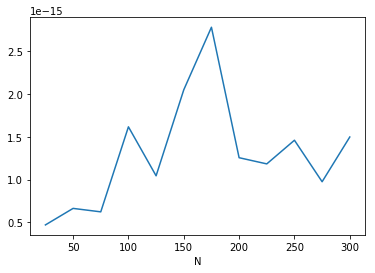

In [11]:
N = np.arange(25,301,25)
L = 5
trials = 100
error = []
for n in N:
    n=int(n)
    print 'Testing N =', n
    e = 0
    for i in range(trials):
        a = np.random.rand(L)
        a[-1] = 1
        M = getLMatrix(a)
        S = 100*np.random.rand(L, n)
        v_f = v(n-1, M, S)
        solver = MProcessSolver(S, v_f)
        M_solved = getLMatrix(solver.getGenSol())
        e += RMSE(M, M_solved)
    error.append(e/trials)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N,error)
ax.set_xlabel('N')
plt.show()

Testing L = 2
Testing L = 3
Testing L = 4
Testing L = 5
Testing L = 6
Testing L = 7
Testing L = 8
Testing L = 9
Testing L = 10
Testing L = 11
Testing L = 12
Testing L = 13
Testing L = 14
Testing L = 15
Testing L = 16
Testing L = 17
Testing L = 18
Testing L = 19
Testing L = 20
Testing L = 21
Testing L = 22
Testing L = 23
Testing L = 24
Testing L = 25
Testing L = 26
Testing L = 27
Testing L = 28
Testing L = 29
Testing L = 30


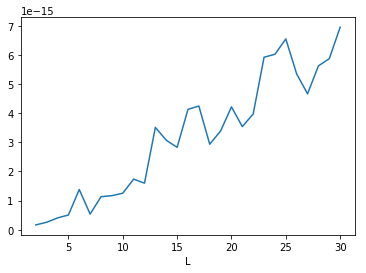

In [5]:
N = 50
L = np.arange(2,31)
trials = 100
error = []
for l in L:
    l=int(l)
    print 'Testing L =', l
    e = 0
    for i in range(trials):
        a = np.random.rand(l)
        a[-1] = 1
        M = getLMatrix(a)
        S = 100*np.random.rand(l, N)
        v_f = v(N-1, M, S)
        solver = MProcessSolver(S, v_f)
        M_solved = getLMatrix(solver.getGenSol())
        e += RMSE(M, M_solved)
    error.append(e/trials)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(L,error)
ax.set_xlabel('L')
plt.show()

The more important test is how well the solver can deal with slightly noisy data. Below are the same two tests as above, but with some noise added in to the measured final distribution.

In [7]:
N = np.arange(25,301,25)
L = 5
noise=0.1
trials = 100
error = []
for n in N:
    n=int(n)
    print 'Testing N =', n
    e = 0
    for i in range(trials):
        a = np.random.rand(L)
        a[-1] = 1
        M = getLMatrix(a)
        S = 100*np.random.rand(L, n)
        v_f = v(n-1, M, S) + noise*np.random.randn(L,1)
        solver = MProcessSolver(S, v_f)
        M_solved = getLMatrix(solver.getGenSol())
        e += RMSE(M, M_solved)
    error.append(e/trials)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N,error)
ax.set_xlabel('N')
plt.show()

Testing N = 25
Testing N = 50
Testing N = 75
Testing N = 100
Testing N = 125
Testing N = 150


KeyboardInterrupt: 

Testing L = 2
Testing L = 3
Testing L = 4
Testing L = 5
Testing L = 6
Testing L = 7
Testing L = 8
Testing L = 9
Testing L = 10
Testing L = 11
Testing L = 12
Testing L = 13
Testing L = 14
Testing L = 15
Testing L = 16
Testing L = 17
Testing L = 18
Testing L = 19
Testing L = 20
Testing L = 21
Testing L = 22
Testing L = 23
Testing L = 24
Testing L = 25
Testing L = 26
Testing L = 27
Testing L = 28
Testing L = 29
Testing L = 30


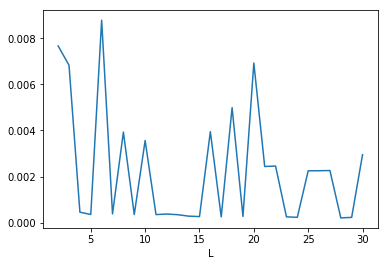

In [8]:
N = 50
L = np.arange(2,31)
noise=0.1
trials = 100
error = []
for l in L:
    l=int(l)
    print 'Testing L =', l
    e = 0
    for i in range(trials):
        a = np.random.rand(l)
        a[-1] = 1
        M = getLMatrix(a)
        S = 100*np.random.rand(l, N)
        v_f = v(N-1, M, S) + noise*np.random.randn(l,1)
        solver = MProcessSolver(S, v_f)
        M_solved = getLMatrix(solver.getGenSol())
        e += RMSE(M, M_solved)
    error.append(e/trials)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(L,error)
ax.set_xlabel('L')
plt.show()

Interestingly, the clear pattern visible before disappears, giving way to a much more volatile plot. The errors are still under control, but one might ask why they look so random. One reason is that, by adding noise, we remove the guarantee of a perfect M-process solution, and thus there is a possibility for very extreme outliers. We have no methods for estimating how close we should be able to get without a perfect solution, although it seems that good estimates are possible in most cases: the histogram below shows the presence of extreme outliers against a backdrop of reasonable errors.

Testing L = 2
Testing L = 3
Testing L = 4
Testing L = 5
Testing L = 6
Testing L = 7
Testing L = 8
Testing L = 9
Testing L = 10
Testing L = 11
Testing L = 12
Testing L = 13
Testing L = 14
Testing L = 15
Testing L = 16
Testing L = 17
Testing L = 18
Testing L = 19
Testing L = 20
Testing L = 21
Testing L = 22
Testing L = 23
Testing L = 24
Testing L = 25
Testing L = 26
Testing L = 27
Testing L = 28
Testing L = 29
Testing L = 30


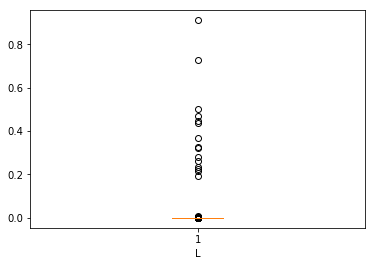

In [13]:
N = 50
L = np.arange(2,31)
noise=0.1
trials = 100
error = []
for l in L:
    l=int(l)
    print 'Testing L =', l
    e = 0
    for i in range(trials):
        a = np.random.rand(l)
        a[-1] = 1
        M = getLMatrix(a)
        S = 100*np.random.rand(l, N)
        v_f = v(N-1, M, S) + noise*np.random.randn(l,1)
        solver = MProcessSolver(S, v_f)
        M_solved = getLMatrix(solver.getGenSol())
        error.append(RMSE(M, M_solved))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(error)
ax.set_xlabel('L')
plt.show()

More work: Discard the outliers (no real point though, this only works if we have tons of test data which we will not have in analyzing actual data). Figuring out a way to warn of impending, large-error outliers (perhaps hints are buried in the technical analysis). Continue testing out variants of the diagnostics so as the find the most revealing ones.